# Data Cleaning Practices

In this lab, we will apply learned concepts from Day 1-2 lectures to perform data cleaning on a given Airbnb data set. 

This dataset (raw.csv) contains 30k+ records on hotels in the top-10 tourist destinations and major US metropolitan areas sraped from Airbnb.com. 
Each data record has 40 attributes including the number of bedrooms, price, location, etc. 
The attribute "pop2016" means population of the zipcode location (area) in year 2016.
Demographic and economic attributes were scraped from city-data.com. 

The prediction label is Rating of hotel (Y/N - whether the rating of each hotel is 5 or not). 

## Submission: submit via onq. 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install missingno

In [3]:
# Step 1: Import needed libraries. E.g., pandas, missingno, and sklearn
import pandas as pd
import numpy as np
import sklearn 
import missingno as msno

## Task 1: Read dataset and perform basic data exploration. Specially, you should write code to explore the types of data provided

In [4]:
# TODO for Task 1, put your code here to perform data type and data scale check
data = pd.read_csv('/content/drive/MyDrive/raw.csv')
data

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
0,1.0,1.0,1.0,Atlanta,2.0,7.0,38.0,Y,33.75515,-84.32992,...,5306.0,75,1.413494,104.743243,35.280702,4.944444,1.459459,1.845070,2.146667,2.146667
1,1.0,1.0,1.0,Atlanta,2.0,15.0,38.0,N,33.82613,-84.33963,...,10537.2,96,0.911058,103.673684,21.169231,4.847458,1.281250,1.473118,1.687500,1.687500
2,2.0,2.0,2.0,Atlanta,4.0,17.0,100.0,Y,33.75076,-84.37058,...,9114.4,200,2.194330,119.368687,40.400000,4.937500,1.375000,1.602094,1.925000,1.925000
3,1.0,1.0,1.0,Atlanta,2.0,304.0,78.0,Y,33.77059,-84.33538,...,7808.0,130,1.664959,119.914729,44.063158,4.892857,1.292308,1.603306,1.953846,1.953846
4,1.0,1.0,1.0,Atlanta,2.0,19.0,50.0,Y,33.79030,-84.40027,...,9343.6,190,2.033477,131.058511,28.444444,4.881679,1.326316,1.580838,1.968421,1.968421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33140,1.0,1.0,2.0,Washington,5.0,159.0,67.0,N,38.90956,-77.03107,...,5300.0,123,2.320755,135.268293,52.009174,4.800000,1.262295,1.453704,2.203252,2.203252
33141,2.0,1.0,4.0,Washington,1.0,28.0,49.0,Y,38.90920,-77.02622,...,5300.0,123,2.320755,135.268293,52.009174,4.800000,1.262295,1.453704,2.203252,2.203252
33142,1.0,1.0,1.0,Washington,2.0,106.0,120.0,Y,38.88746,-76.99119,...,11794.8,410,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805
33143,1.0,1.0,2.0,Washington,3.0,296.0,70.0,Y,38.88535,-76.98183,...,11794.8,410,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33145 entries, 0 to 33144
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Bathrooms                                           32697 non-null  float64
 1   Bedrooms                                            29818 non-null  float64
 2   Beds                                                32831 non-null  float64
 3   LocationName                                        32826 non-null  object 
 4   NumGuests                                           32831 non-null  float64
 5   NumReviews                                          32829 non-null  float64
 6   Price                                               32507 non-null  float64
 7   Rating                                              33145 non-null  object 
 8   latitude                                            33145 non-null  float64


In [6]:
data.describe()

,Bathrooms,Bedrooms,Beds,NumGuests,NumReviews,Price,latitude,longitude,zipcode,pop2016,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
count,32697.000000,29818.000000,32831.000000,32831.000000,32829.000000,32507.000000,33145.000000,33145.000000,33145.000000,33103.000000,...,33103.000000,33145.000000,33103.000000,33145.000000,33145.000000,33145.000000,33145.000000,33145.000000,33145.000000,33145.000000
mean,1.215891,1.474479,1.940148,3.528373,51.086296,117.885071,36.700842,-97.464214,57754.753990,34018.967163,...,13607.586865,739.072077,36.405024,126.129854,49.056798,4.819490,1.236122,1.500675,1.952938,1.952938
std,0.547114,0.839045,1.421961,2.260288,62.151818,97.025832,5.198376,21.231474,36716.353574,22522.663845,...,9009.065538,1167.458959,96.259056,38.451543,16.486948,0.069848,0.131183,0.226741,0.356269,0.356269
min,0.000000,1.000000,0.000000,1.000000,2.000000,10.000000,25.452690,-122.544590,2108.000000,69.000000,...,27.600000,1.000000,0.003440,16.000000,4.000000,4.250000,0.344828,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,11.000000,63.000000,32.749120,-122.259300,19147.000000,15504.000000,...,6201.600000,114.000000,0.805234,102.277778,38.602771,4.781250,1.178295,1.376812,1.732456,1.732456
50%,1.000000,1.000000,1.000000,3.000000,28.000000,90.000000,37.796110,-90.079520,70118.000000,33392.000000,...,13356.800000,284.000000,2.234994,117.697403,46.406699,4.835329,1.223011,1.461605,1.902098,1.902098
75%,1.000000,2.000000,2.000000,4.000000,67.000000,139.000000,40.647290,-75.181480,94112.000000,45420.000000,...,18168.000000,703.000000,5.538630,145.340708,57.070000,4.869565,1.317597,1.600000,2.145043,2.145043
max,9.000000,10.000000,20.000000,16.000000,1099.000000,999.000000,47.742760,-70.983350,98177.000000,114602.000000,...,45840.800000,4143.000000,330.488194,347.000000,206.000000,5.000000,3.043478,3.333333,6.000000,6.000000


In [7]:
data['Rating'].value_counts()

Y    22437
N    10708
Name: Rating, dtype: int64

## Task 2: Data quality check, does duplicate entries exit in this table? Do they have consistent values? Briefely explain your methodology and your findings within this markdown cell, and write corresponding code in the next code cell.


####Yes, the data contains 4254 duplicate rows.
#### Yes, data has consistent values.

In [8]:
# TODO for Task 2
#no. of duplicated rows
data.duplicated().sum()

4254

In [9]:
data[data.duplicated()]

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
4815,1.0,1.0,1.0,New Orleans,2.0,89.0,120.0,Y,29.96457,-90.05337,...,4704.4,703,14.943457,94.171920,83.967239,4.823668,1.211127,1.524242,2.066856,2.066856
4818,1.0,NaN,1.0,New Orleans,2.0,39.0,70.0,N,29.95745,-90.06990,...,1115.2,562,50.394548,91.775986,42.848077,4.769981,1.227758,1.337838,1.989324,1.989324
4820,2.0,2.0,3.0,New Orleans,8.0,81.0,60.0,N,29.95404,-90.07364,...,1115.2,562,50.394548,91.775986,42.848077,4.769981,1.227758,1.337838,1.989324,1.989324
4821,1.0,NaN,1.0,New Orleans,2.0,56.0,95.0,Y,29.97018,-90.09818,...,14967.6,829,5.538630,109.845499,49.687906,4.878179,1.249698,1.848285,2.343788,2.343788
4822,2.0,2.0,4.0,New Orleans,8.0,4.0,100.0,N,29.95312,-90.07124,...,1115.2,562,50.394548,91.775986,42.848077,4.769981,1.227758,1.337838,1.989324,1.989324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33129,1.0,2.0,2.0,Washington,6.0,17.0,60.0,N,38.87294,-76.97248,...,22297.2,227,1.018065,145.340708,27.687500,4.650000,1.367257,1.681818,2.756637,2.756637
33130,1.0,1.0,1.0,Arlington,4.0,46.0,89.0,Y,38.89807,-77.08786,...,10717.2,1265,11.803456,168.866129,31.233509,4.787722,1.254358,1.434460,1.716996,1.716996
33131,1.0,1.0,1.0,Washington,3.0,32.0,89.0,Y,38.88014,-76.98379,...,11794.8,410,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805
33137,1.0,3.0,4.0,Arlington,6.0,18.0,130.0,Y,38.89802,-77.10512,...,10717.2,1265,11.803456,168.866129,31.233509,4.787722,1.254358,1.434460,1.716996,1.716996


In [10]:
data.drop_duplicates(inplace=True)

## Task 3: Data quality check, write code and answer:
3.1 does missing value exit in the table? 
3.2 Where are the missing data? 
3.3 How much data is missing?
3.4 Are there any variables often missing together？

You can use missingno library to generate plots to support your claim. 
Summarize your findings for task 3 in this markdown cell and write corresponding code in the next code cell.

### 3.1 Does missing value exit in the table?

In [11]:
#TODO for Task 3
#count of nulls
np.count_nonzero(data.isna())

18418

### 3.2 Where are the missing data?

The missing value in:

median taxes (with mortgage)

median taxes (no mortgage)

median monthly owner costs (no mortgage)

median monthly owner costs (with mortgage)

median house value

Bedrooms

Price
Bathrooms

LocationName 

NumReviews

Beds
NumGuests

median gross rent

median asking price for vacant for-sale home/condo

unemployment (%)

prop taxes paid 2016

median houshold income
Number of Homes

cost_living_index (US avg. = 100)

pop2010                  


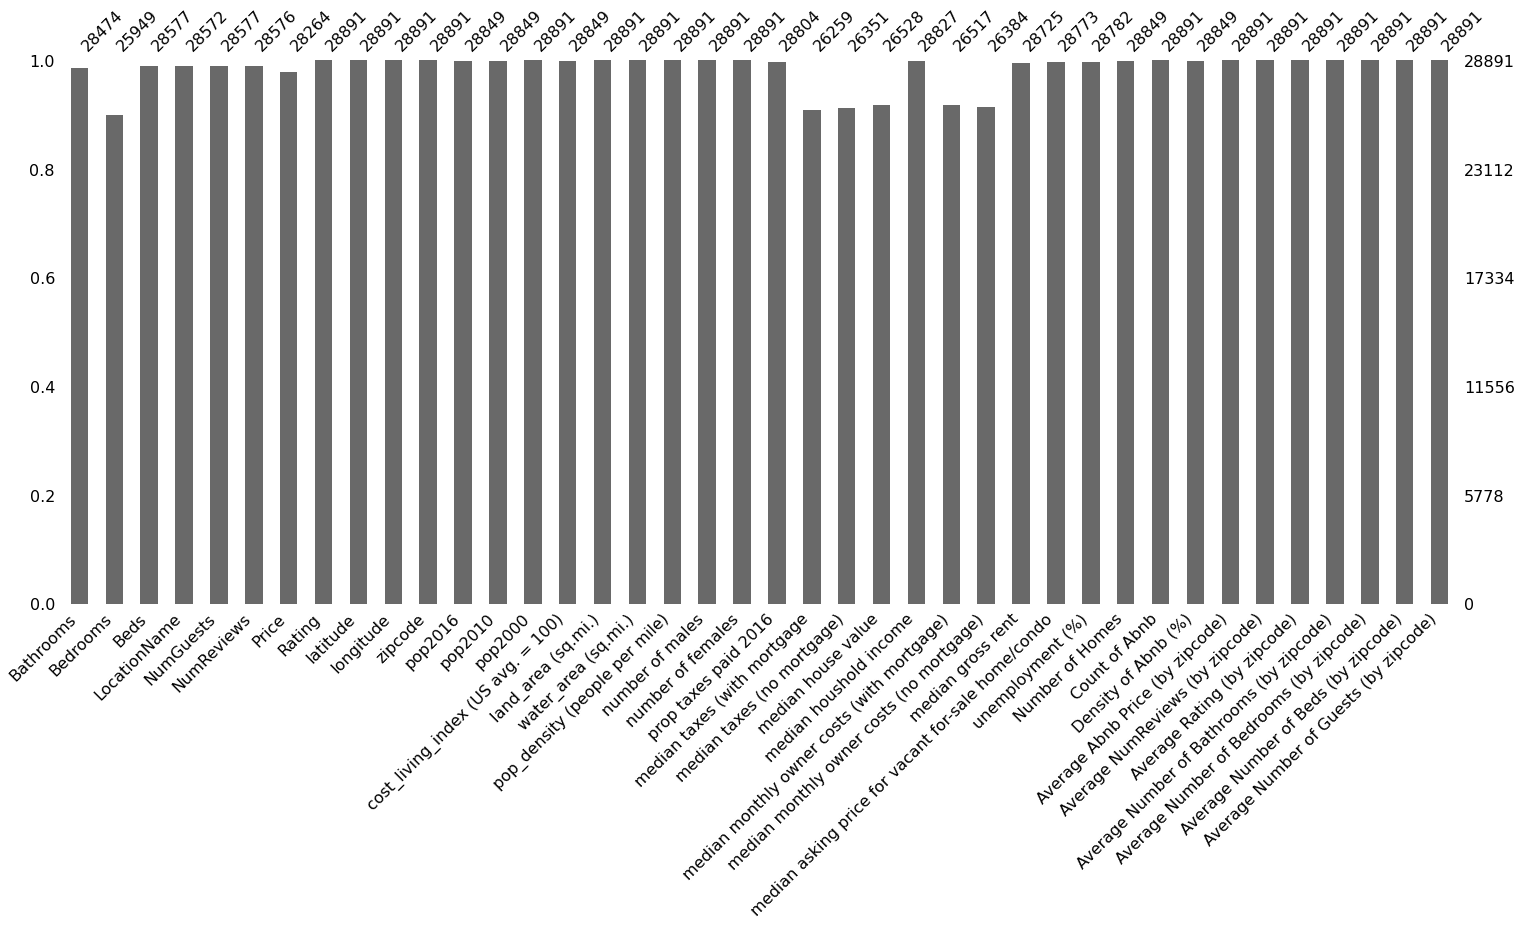

In [12]:
#missing data
msno.bar(data)

### 3.3 How much data is missing?

The data contain 23766 missing values

In [13]:
data.isnull().sum().sort_values(ascending=False)

Bedrooms                                              2942
median taxes (with mortgage                           2632
median taxes (no mortgage)                            2540
median monthly owner costs (no mortgage)              2507
median monthly owner costs (with mortgage)            2374
median house value                                    2363
Price                                                  627
Bathrooms                                              417
LocationName                                           319
NumReviews                                             315
Beds                                                   314
NumGuests                                              314
median gross rent                                      166
median asking price for vacant for-sale home/condo     118
unemployment (%)                                       109
prop taxes paid 2016                                    87
median houshold income                                  

### 3.4 Are there any variables often missing together？

As we see in heatmap, Beds frature has high coorelation of missing values with LocationName, NumGuests and NumReviews.

LocationName has high coorelation with NumGuests and NumReviews.

NumGuests is coorelated with NumReviews.



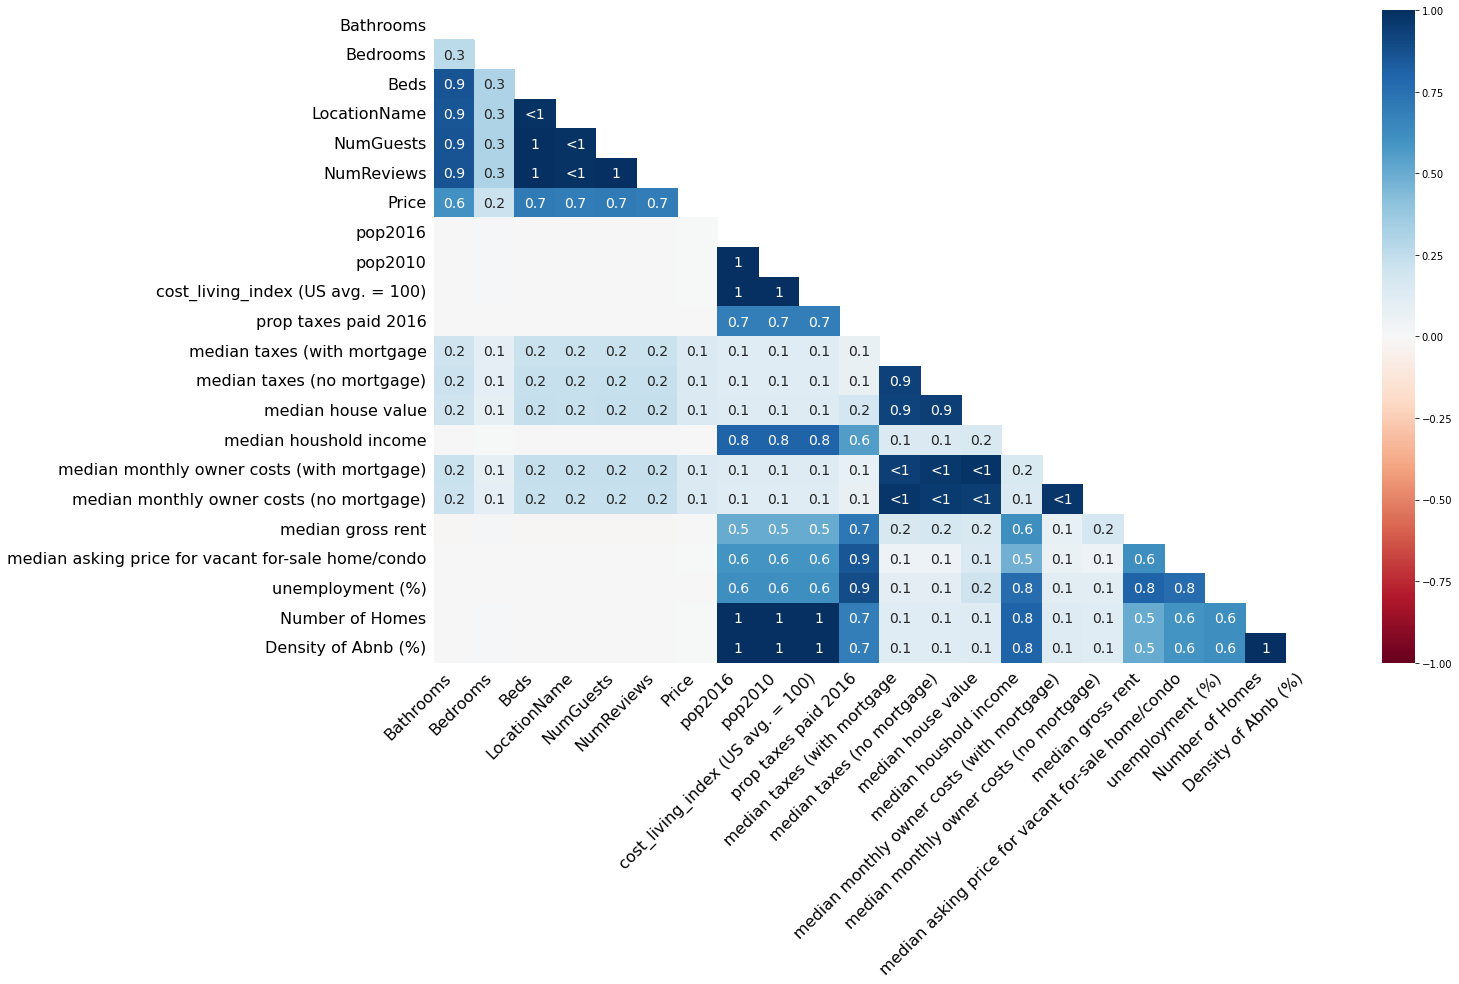

In [14]:
msno.heatmap(data)

## Task 4: What are the potential mechnisms of the missing values? Briefely explain your methodology and your findings (within this markdown cell), and write corresponding code in the next code cell.

1-Bedrooms feature has MCAR

2-Bathrooms, beds, LocationName , NumGuests, NumReviews and price have MAR

3-median taxes (with mortgage), median taxes (no mortgage), median house value, median monthly owner costs (no mortgage) and median monthly owner costs (with mortgage) have MNAR

taxes no mortgage depends on taxes with mortgage and that is the reason of missing at the same slot and median house value.

median monthly owner costs(with mortgage) and (no mortgage) too.



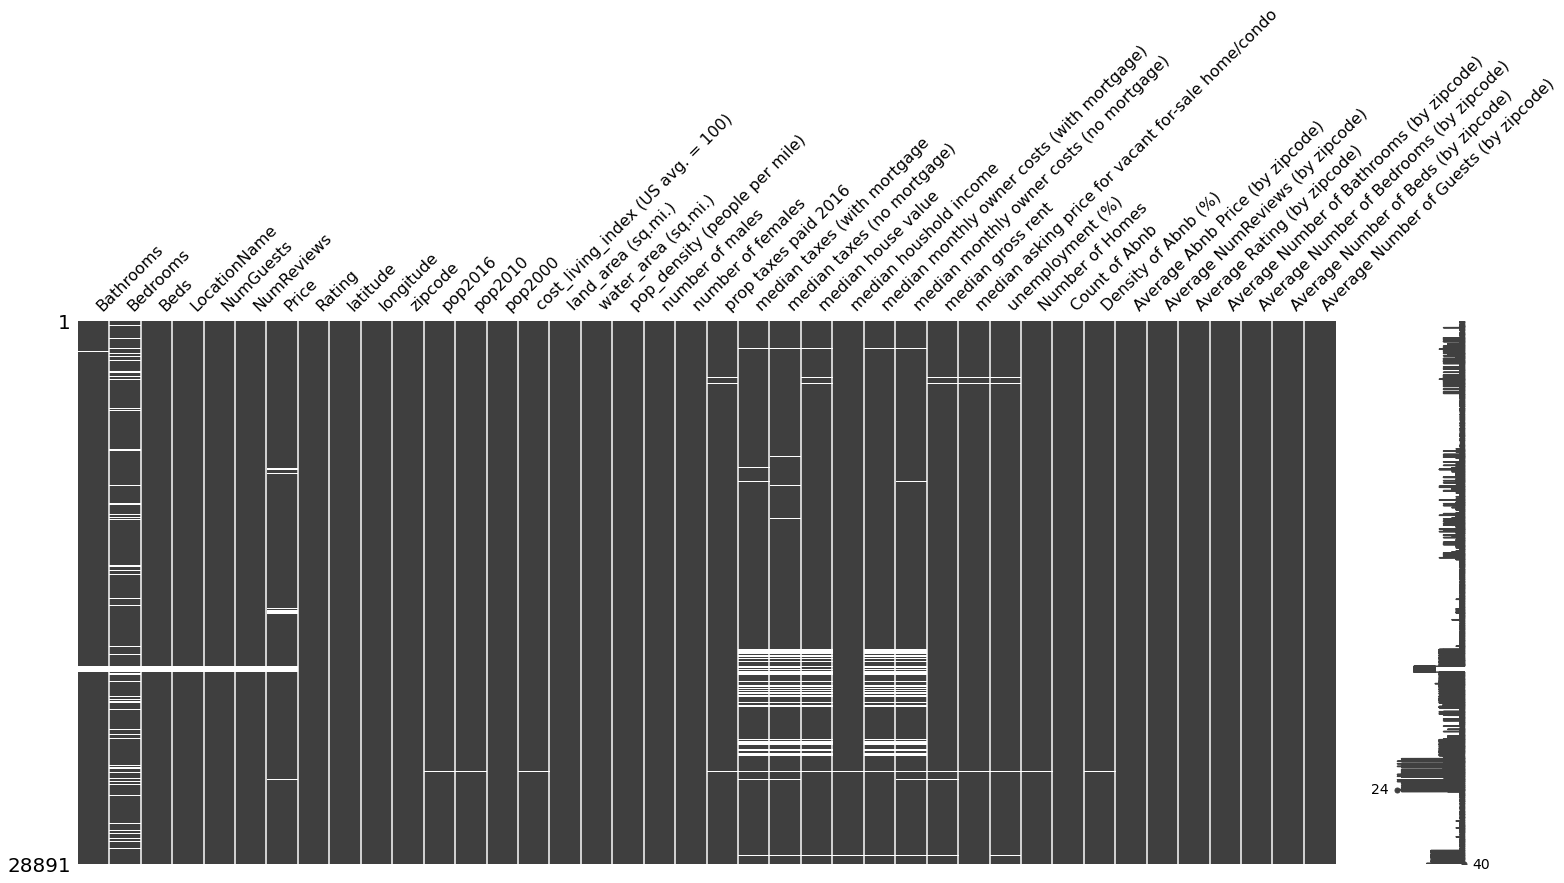

In [15]:
# TODO for Task 4
msno.matrix(data)

## Task 5: Handling missing values, Briefely explain your methodology below (within this markdown cell), and write corresponding code in the next code cell.

In [16]:
# TODO for Task 5
# you can also count the ratio of missing values
total_miss = data.isnull().sum()
percent_miss = (total_miss/data.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)

,Total missing,% missing
Bedrooms,2942,10.183102
median taxes (with mortgage,2632,9.110103
median taxes (no mortgage),2540,8.791665
median monthly owner costs (no mortgage),2507,8.677443
median monthly owner costs (with mortgage),2374,8.217092
median house value,2363,8.179018
Price,627,2.170226
Bathrooms,417,1.443356
LocationName,319,1.104150
NumReviews,315,1.090305


### **Depending on MCAT we will apply Listwise Deletion.**
Depending on percentage of missing values on dataset and MCAT we can drop nulls from some of columns that have very small percentage.

In [17]:
data=data.dropna(subset=['Density of Abnb (%)', 'pop2016','pop2010','cost_living_index (US avg. = 100)','Number of Homes','median houshold income',
                          'prop taxes paid 2016','unemployment (%)','median gross rent','median asking price for vacant for-sale home/condo'])


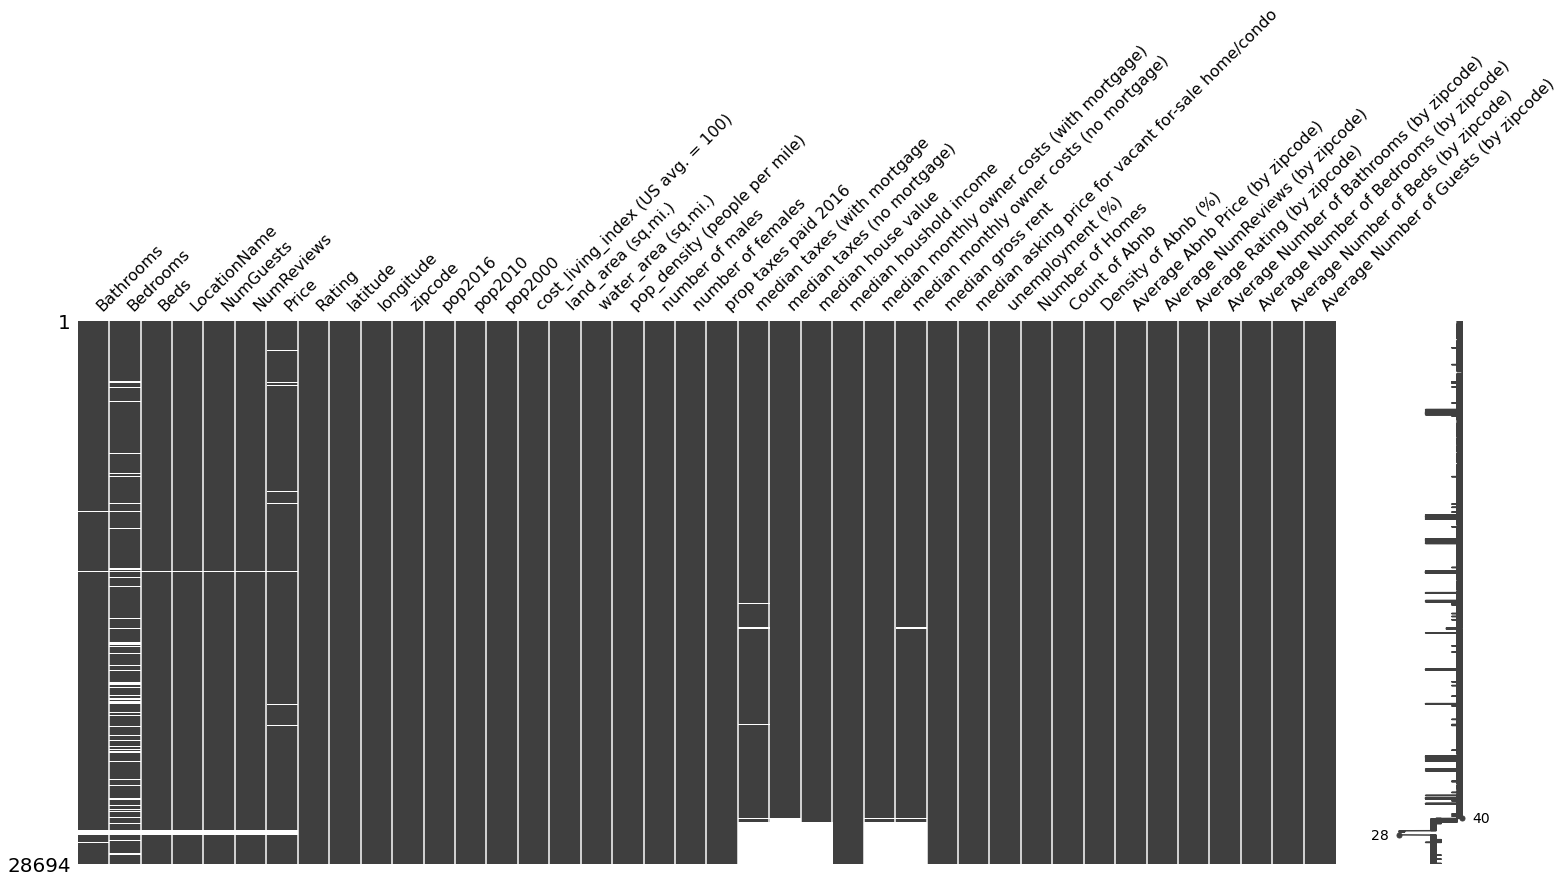

In [18]:
# TODO for Task 4
sorted=data.sort_values('median taxes (no mortgage)')
msno.matrix(sorted)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbb2164910>]],
      dtype=object)

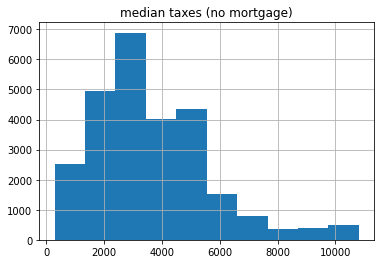

In [19]:
data.hist(column='median taxes (no mortgage)')

### We'll use MICE for imuptation because it is very robust model for imputation.

In [20]:
data['LocationName'].value_counts()

San Diego               4452
New Orleans             2755
San Francisco           2493
Brooklyn                2244
New York                2178
                        ... 
Astoria,New York           1
Saint Albans               1
City Island                1
Astoria, Queens            1
Suitland-Silver Hill       1
Name: LocationName, Length: 274, dtype: int64

In [21]:
data["LocationName"].fillna("San Diego", inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [22]:
data['LocationName'].value_counts()

San Diego               4771
New Orleans             2755
San Francisco           2493
Brooklyn                2244
New York                2178
                        ... 
Astoria,New York           1
Saint Albans               1
Astoria, Queens            1
woodside                   1
Suitland-Silver Hill       1
Name: LocationName, Length: 274, dtype: int64

In [23]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
data['LocationName']= label_encoder.fit_transform(data['LocationName'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [24]:
data['LocationName'] = data['LocationName'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
data['Rating'].unique()

array(['Y', 'N'], dtype=object)

In [26]:
data['Rating']= label_encoder.fit_transform(data['Rating'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
data['Rating'].unique()

array([1, 0])

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imput = IterativeImputer(random_state=0)
data_ = data.copy(deep=True)
data_.iloc[:,:]=imput.fit_transform(data_)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [29]:
data_

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
0,1.0,1.0,1.0,15.0,2.0,7.0,38.0,1.0,33.75515,-84.32992,...,5306.0,75.0,1.413494,104.743243,35.280702,4.944444,1.459459,1.845070,2.146667,2.146667
1,1.0,1.0,1.0,15.0,2.0,15.0,38.0,0.0,33.82613,-84.33963,...,10537.2,96.0,0.911058,103.673684,21.169231,4.847458,1.281250,1.473118,1.687500,1.687500
2,2.0,2.0,2.0,15.0,4.0,17.0,100.0,1.0,33.75076,-84.37058,...,9114.4,200.0,2.194330,119.368687,40.400000,4.937500,1.375000,1.602094,1.925000,1.925000
3,1.0,1.0,1.0,15.0,2.0,304.0,78.0,1.0,33.77059,-84.33538,...,7808.0,130.0,1.664959,119.914729,44.063158,4.892857,1.292308,1.603306,1.953846,1.953846
4,1.0,1.0,1.0,15.0,2.0,19.0,50.0,1.0,33.79030,-84.40027,...,9343.6,190.0,2.033477,131.058511,28.444444,4.881679,1.326316,1.580838,1.968421,1.968421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33140,1.0,1.0,2.0,252.0,5.0,159.0,67.0,0.0,38.90956,-77.03107,...,5300.0,123.0,2.320755,135.268293,52.009174,4.800000,1.262295,1.453704,2.203252,2.203252
33141,2.0,1.0,4.0,252.0,1.0,28.0,49.0,1.0,38.90920,-77.02622,...,5300.0,123.0,2.320755,135.268293,52.009174,4.800000,1.262295,1.453704,2.203252,2.203252
33142,1.0,1.0,1.0,252.0,2.0,106.0,120.0,1.0,38.88746,-76.99119,...,11794.8,410.0,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805
33143,1.0,1.0,2.0,252.0,3.0,296.0,70.0,1.0,38.88535,-76.98183,...,11794.8,410.0,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805


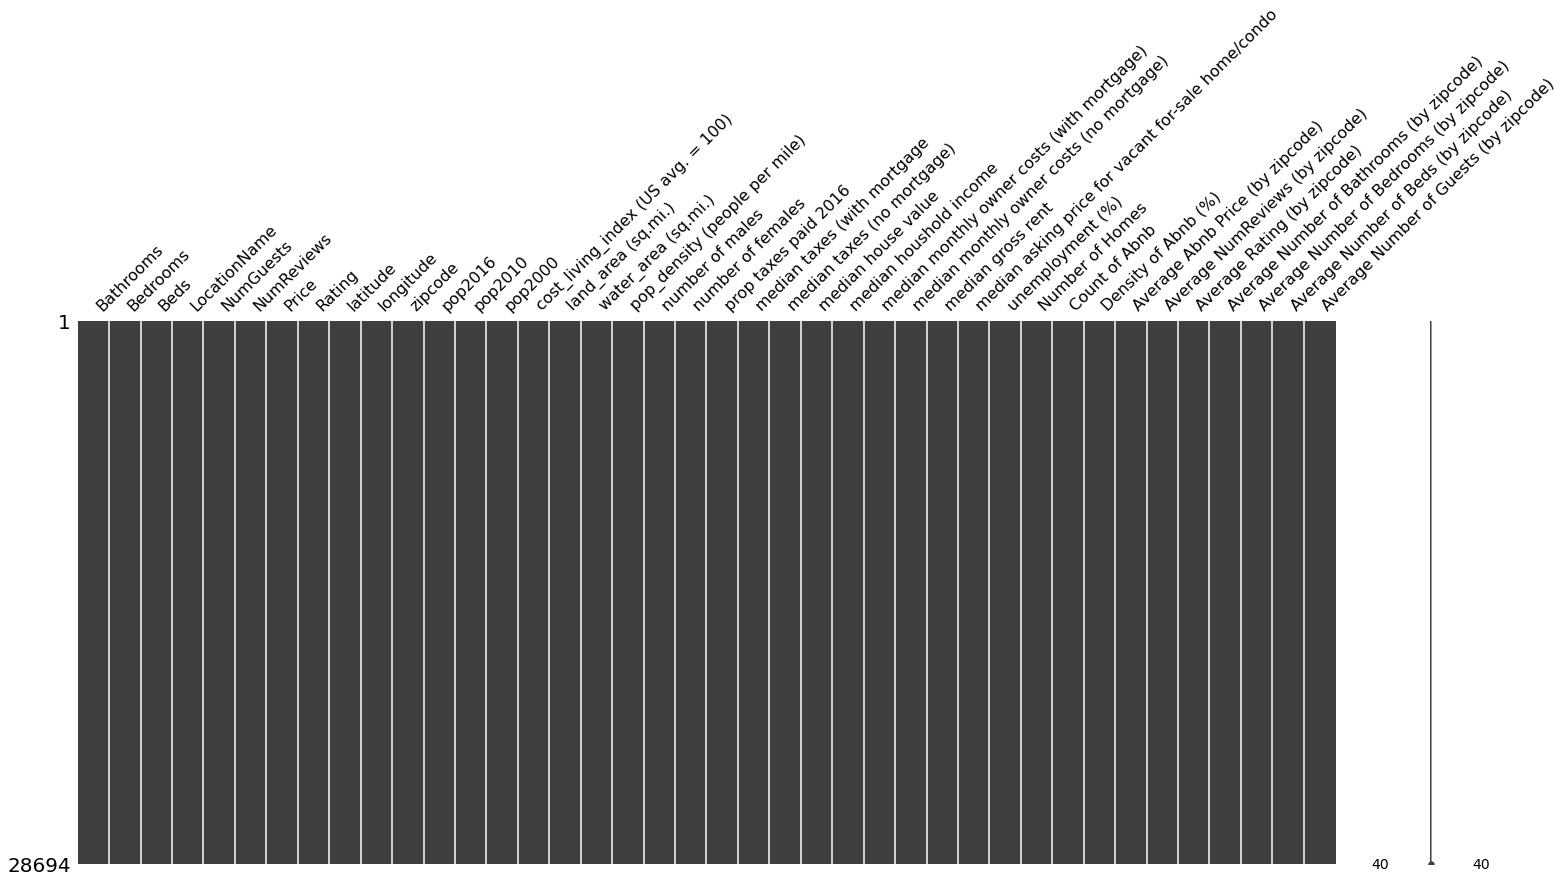

In [30]:
msno.matrix(data_)

### At first I will use most frequent data to fill missing values on LocationName feature. Secondly I'll use iterativeImputer to fill nulls in remain features because it is robust in imputation.

##Task 6: Impact on classification performance. 
Consider one of the above handling method you proposed for this dataset and perform classification tast to investigate if your handling method can improve classificaiton performance. 

Train-test split: you can do one split of train and test where 70% of the data for training and the remaining 30% for testing. 
Classifier: you can pick any two tranditional binary classifier (e.g., from sklearn)

In [31]:
x=data_.drop(columns=['Rating'])
y=data_['Rating']

In [32]:
#rescale train data to be simpler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(x)

In [33]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
xg=XGBClassifier(max_depth=7, learning_rate=0.01, n_estimators=100,verbosity=1,n_jobs=1)
xg.fit(X_train,y_train)
pred = xg.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.7073992333604368


## Task 7: Report your findings through the above experiments (in this markdown cell)




*   We apply Listwise deletion on MCAR data.
*   We apply mean-median-mode or multiple mechanesims for MAR or MNAR data.
*   Encode categorical values to impute categorical data.
*   MICE applies multiple regression for imputing.
*   MICE is very robust for imputation.
*   We can use missingness to check corelation between missing data features.


